In [2]:
# https://www.bmc.com/blogs/keras-neural-network-classification/

import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

# Loading data
data = pd.read_csv('Group16_ClassificationData.csv', delimiter=',')

In [3]:
# Show data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Inspect data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

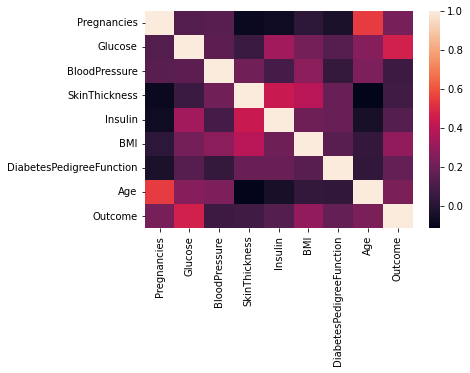

In [6]:
# Check Correlation between varibales using heat map

import seaborn as sns
import matplotlib as plt
corr = data.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [7]:
# Can check correlation between two variables like this:
data['BloodPressure'].corr( data["BMI"])
data["Pregnancies"].corr(data["Age"])

0.544341228402339

In [8]:
# Prepare the test and training data sets
import numpy as np
labels=data['Outcome'] # labels is not an array. It is a column in a dataset. So we use the NumPy np.ravel() function to convert that to an array.
features = data.iloc[:,0:8]
from sklearn.model_selection import train_test_split
X=features
y=np.ravel(labels) # converting labels into an array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 20% of data for test

In [9]:
# Normalizing values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [10]:
# Activation function
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,))) # It’s (8,) since it’s a vector of 8 features. In other words its 8 x 1.
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Binary crosscentropy since because out output is 1 or 0
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=4, batch_size=1, verbose=1)

Epoch 1/4
614/614 [==============================] - 2s 3ms/step - loss: 0.6004 - accuracy: 0.7020
Epoch 2/4
614/614 [==============================] - 2s 3ms/step - loss: 0.5105 - accuracy: 0.7671
Epoch 3/4
614/614 [==============================] - 2s 3ms/step - loss: 0.4848 - accuracy: 0.7687
Epoch 4/4
614/614 [==============================] - 2s 3ms/step - loss: 0.4764 - accuracy: 0.7638


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Printing the weights for each layer
for layer in model.layers:
    weights = layer.get_weights()
print(weights)

[array([[-0.02885751],
       [-1.1204336 ],
       [-0.7095695 ],
       [ 0.28418872],
       [ 0.27785742],
       [ 0.5195055 ],
       [-0.43949398],
       [ 0.49370253]], dtype=float32), array([-0.5550575], dtype=float32)]


In [14]:
# Now run predictions on test data
y_predict = np.argmax(model.predict(X_test), axis=1)

In [15]:
# Print score/accuracy
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5/5 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.7662
[0.4977196156978607, 0.7662337422370911]


AxesSubplot(0.125,0.125;0.62x0.755)


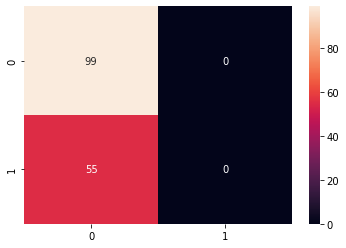

In [16]:
# Print Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(sns.heatmap(cm, annot=True))